In [6]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [3]:
# 이상치 확인하기
# 3이라는 값이 하나 있는걸 확인
df['sex'].value_counts(sort = False).sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [4]:
#6이라는 이상값 확인
df['score'].value_counts(sort = False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [7]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [8]:
df['score'] = np.where(df['score'] > 5 ,np.nan, df['score'])

In [9]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [10]:
#결측치 제거하고 평균
df.dropna(subset=['sex','score'])\
    .groupby('sex')\
    .agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [11]:
#np where은 문자와 nan을 함께 반환할 수 없다
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan) 
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [13]:
#a가 아니면 nan을 넣기로 했는데 다 nan이 아니라고 나옴 nan이라는 문자열이 저장됨
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [14]:
#결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [15]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)  

In [17]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [18]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


<Axes: ylabel='hwy'>

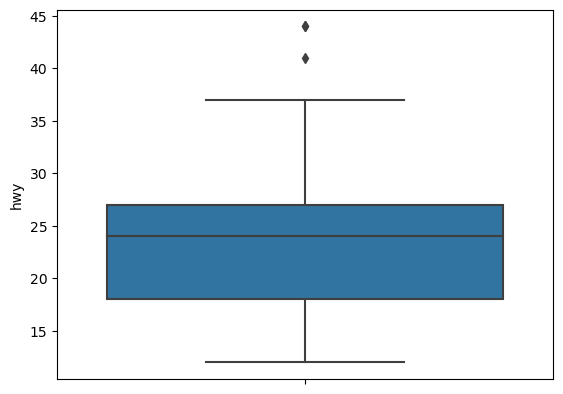

In [20]:
mpg = pd.read_csv('../files/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [22]:
#극단치 기준값 구하기
#하위 25퍼
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [24]:
#하위 75퍼

pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [25]:
#iqr - 사분위 범위
iqr = pct75 - pct25
iqr

9.0

In [26]:
#하한 극단치
pct25 - 1.5 * iqr

4.5

In [27]:
#상한 극단치
pct75 + 1.5 * iqr

40.5

In [28]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [29]:
#결측치 제거하고 분석
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
